In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Question 3

## Data Preprocessing

In [21]:
df = pd.read_csv("hw1data.csv")
df["TICKER"] = df["TICKER"].replace("HBC", "HSBC")
df["date"] = pd.to_datetime(df["date"])
df_list = []
for ticker, x in df.groupby(by="TICKER"):
    x = x.drop(columns=["TICKER", "PERMNO"])
    x = x.rename(columns={"RET": ticker})
    x = x.set_index("date")
    x = x.sort_index()
    if ticker != "MSFT": 
        x = x.drop(columns=["sprtrn"])
    df_list.append(x)

df = pd.concat(df_list, axis=1)
df.head()

,HSBC,MSFT,sprtrn,PFE,XOM
date,,,,,
2010-12-20,-0.000980,-0.003315,0.002548,0.008221,0.000693
2010-12-21,0.006083,0.009349,0.006030,0.012231,0.006923
2010-12-22,0.004681,0.004186,0.003380,0.010357,0.001100
2010-12-23,-0.000776,0.003991,-0.001644,0.002847,0.005494
2010-12-27,-0.005246,-0.008127,0.000613,-0.006814,-0.002596


## Part 3a.

In [22]:
df = df.resample('W').apply(lambda x: (1 + x).prod() - 1)
df.head()

,HSBC,MSFT,sprtrn,PFE,XOM
date,,,,,
2010-12-26,0.009018,0.014246,0.010339,3.405802e-02,0.014271
2011-01-02,-0.008355,-0.013780,0.000692,-5.676861e-03,-0.001093
2011-01-09,0.036441,0.024722,0.011020,4.740118e-02,0.033781
2011-01-16,0.061625,-0.010489,0.017099,-7.686505e-07,0.029767
2011-01-23,-0.010328,-0.009893,-0.007648,1.036071e-03,0.014646


## Part 3b. 

In [23]:
means, stds = df.mean(), df.std()
for ticker, mu, sigma in zip(means.index, means, stds):
    print(f"{ticker}: mean={round(mu, 8)} and std={round(sigma, 8)}")

HSBC: mean=-5.608e-05 and std=0.03086996
MSFT: mean=0.00485563 and std=0.03060063
sprtrn: mean=0.00203102 and std=0.02233255
PFE: mean=0.00234056 and std=0.02707528
XOM: mean=0.00013466 and std=0.03076082


## Part 3c. 

We want to find the 99\% confidence interval for $\mu$, assuming that the true return distributions are normal. Note that since we only have the sample standard deviation as a an estimate, we will use a t-distribution as the pivot. I will omit the derivation of the 
$(1-\alpha)$-confidence interval, and just say that it is given by 
$$[\bar{X} - \frac{S}{\sqrt{n}}t_{\alpha/2, n - 1}, \bar{X} + \frac{S}{\sqrt{n}}t_{\alpha/2, n-1}]$$
Plugging in known values, we can compute this in Python.

In [24]:
mu = df["sprtrn"].mean()
sigma = df["sprtrn"].std()
n = len(df)
alpha = 0.01

pivot = np.abs(stats.t.ppf(alpha / 2, n - 1))
print(f"The 99% confidence interval is [{mu - (sigma / np.sqrt(n)) * pivot, mu + (sigma / np.sqrt(n)) * pivot}]")

The 99% confidence interval is [(-0.0005592882682909769, 0.0046213272114853715)]


In [25]:
f"[{stats.norm.interval(0.99, loc=mu, scale=sigma/np.sqrt(n))}]"

'[(-0.0005493224342463751, 0.004611361377440769)]'

Note that our answer is very similar to the confidence interval provided by `scipy.stats`.

## Part 3d.

Note that a 1% significance level implies finding the 99% confidence interval, which we already have found. Note that 0 is in that confidence interval and therefore not in the rejection region for this hypothesis test. Therefore, I would accept the null hypothesis.

# Problem 4 

## Part 4d.

<Axes: >

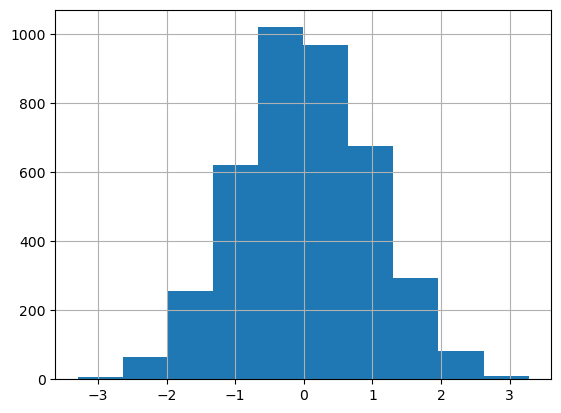

In [45]:
t = 1
n = 2000
delta = 1/n
m = 4000
mu = 0
sigma = np.sqrt(delta)

# Create a generator and then modify the sample normal distribution to get N(\mu, \sigma^2)
rng = np.random.default_rng(seed=1)
dz = rng.standard_normal(n * m).reshape(n, m)
paths = (sigma * dz + mu).cumsum(axis=0)
W1 = pd.Series(paths[-1])
W1.hist()

## Part 4f.

In [51]:
mu = W1.mean()
var = W1.var()
f"The sample average was {mu} and the sample variance was {var}"

'The sample average was 0.025998084651558836 and the sample variance was 0.9393334783921247'

## Part 4g.

We find the confidence interval below using Scipy, and since 0 is in the confidence interval, we accept the null hypothesis that 0 is the true mean of the distribution.

In [62]:
interval = stats.norm.interval(0.95, loc=mu, scale=np.sqrt(var) / np.sqrt(4000))
interval

(-0.0040369402200087015, 0.05603310952312637)

In [63]:
0> interval[0] and 0 < interval[1]

True

## Part 4h.

Since our pvalue > 0.05, we accept the null hypothesis that our distribution is normal.

In [64]:
stats.normaltest(W1)

NormaltestResult(statistic=5.468459443989111, pvalue=0.06494401278689294)

## Part 5a.

Recall that 
$$E(R_p) = w_1\mu_1 + (1-w_1)\mu_2$$
$$\text{Var}(R_p) = w_1^2\sigma_1^2 + (1-w_1)^2\sigma_2^2 + 2w_1(1-w_1)\text{Cov}(R_1, R_2)$$

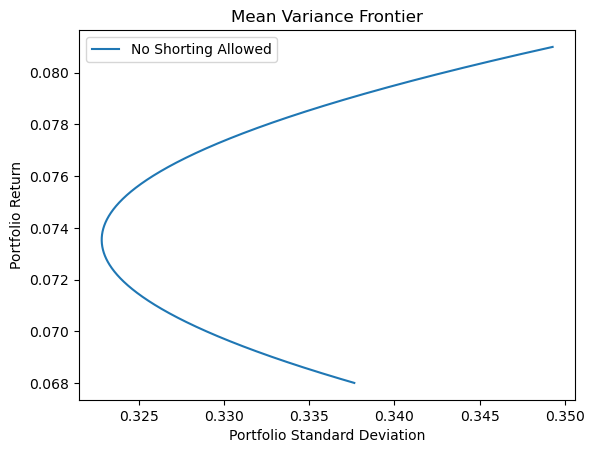

In [14]:
mu1 = 0.068
mu2 = 0.081
var1 = 0.114
var2 = 0.122
cov = 0.091

w_no_short = np.linspace(0, 1, 1000)

rp_no_short = np.array([w * mu1 + (1 - w) * mu2 for w in w_no_short])
stdp_no_short = np.sqrt(np.array([w ** 2 * var1 + (1 - w) ** 2 * var2 + 2 * w * (1 - w) * cov for w in w_no_short]))

plt.plot(stdp_no_short, rp_no_short, label="No Shorting Allowed")
plt.xlabel("Portfolio Standard Deviation")
plt.ylabel("Portfolio Return")
plt.title("Mean Variance Frontier")
plt.legend()
plt.show()

## Part 5b.

Now we allow short-selling

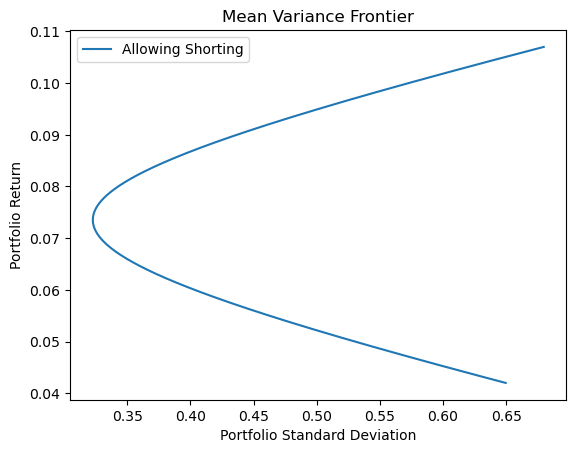

In [30]:
w_short = np.linspace(-2, 3, 1000)
rp_short = np.array([w * mu1 + (1 - w) * mu2 for w in w_short])
stdp_short = np.sqrt(np.array([w ** 2 * var1 + (1 - w) ** 2 * var2 + 2 * w * (1 - w) * cov for w in w_short]))

plt.plot(stdp_short, rp_short, label="Allowing Shorting")
plt.xlabel("Portfolio Standard Deviation")
plt.ylabel("Portfolio Return")
plt.title("Mean Variance Frontier")
plt.legend()
plt.show()

## Part 5c.

In [16]:
tau1, tau2 = 1/4, round(1/1.4, 4)
w1 = w_no_short[np.argmax(rp_no_short - (tau1 * 0.5 * stdp_no_short))]
w2 = round(w_no_short[np.argmax(rp_no_short - (tau2 * 0.5 * stdp_no_short))], 5)

print(f"For tau={tau1}, the optimal portfolio is {w1} in asset 1 and {1-w1} in asset 2")
print(f"For tau={tau2}, the optimal portfolio is {w2} in asset 1 and {1-w2} in asset 2")

For tau=0.25, the optimal portfolio is 0.0 in asset 1 and 1.0 in asset 2
For tau=0.7143, the optimal portfolio is 0.35335 in asset 1 and 0.64665 in asset 2


## Part 5d.

In [17]:
w1 = w_short[np.argmax(rp_short - (tau1 * 0.5 * stdp_short))]
w2 = round(w_short[np.argmax(rp_short - (tau2 * 0.5 * stdp_short))], 5)

print(f"For tau={tau1}, the optimal portfolio is {w1} in asset 1 and {1-w1} in asset 2")
print(f"For tau={tau2}, the optimal portfolio is {w2} in asset 1 and {1-w2} in asset 2")

For tau=0.25, the optimal portfolio is -0.12312312312312312 in asset 1 and 1.1231231231231231 in asset 2
For tau=0.7143, the optimal portfolio is 0.35235 in asset 1 and 0.6476500000000001 in asset 2


## Part 5e.

With no short selling constraint and no leverage constraints (ie. the investor can lend and borrow at the risk-free rate), all feasible efficient portfolios fall on the orange line, which represents maximum Sharpe Ratio (risk-adjusted returns).

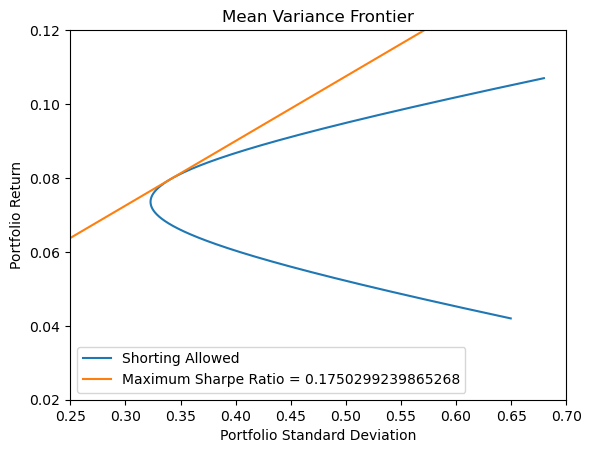

In [29]:
plt.plot(stdp_short, rp_short, label="Shorting Allowed")
maxSR = np.max((rp_short - 0.02) / stdp_short)
plt.plot(w_short, maxSR * w_short + 0.02, label=f"Maximum Sharpe Ratio = {maxSR}")
plt.xlabel("Portfolio Standard Deviation")
plt.ylabel("Portfolio Return")
plt.title("Mean Variance Frontier")
plt.xlim(0.25, 0.70)
plt.ylim(0.02, 0.12)
plt.legend()
plt.show()

## Part 5f.

a. In the situation where the investor is leverage-constrained, the efficient frontier is the point that the line of maximum Sharpe Ratio is tangent to the Mean Variance Frontier, and all investors will desire that portfolio.

b. Given that all investors have the same information, they will all seek the tangent portfolio. Thus, since demand for this portfolio is increasing, so will the price. Consequently, the price of the portfolios riskier than the tangent portfolio will decrease because investors do not want these portfolios, until the price of these portfolios decreases to the point where these portfolio become desirable again, and the market reaches equilibrium.